# Module - 6

RANDOM FOREST CLASSIFIER

In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=p.read_csv('data.csv')

In [4]:
data.columns

Index(['S.No', 'Crime', 'Gender', 'Age', 'Income', 'Job', 'Maritalstatus',
       'Education', 'Harm', 'Attack', 'AttackMethod', 'Perpetrator'],
      dtype='object')

In [5]:
df=data.dropna()

In [6]:
df

,S.No,Crime,Gender,Age,Income,Job,Maritalstatus,Education,Harm,Attack,AttackMethod,Perpetrator
0,0,Misuse of Debit Cards or Credit Cards,Male,Between 38 and 50,Middle,Technical,Married,Primary Education,Fraud,Hacking Social Media Accounts,Creating a Fake Shopping Site,UnKnown
1,1,Misuse of Debit Cards or Credit Cards,Female,27 and Under,Low,Student,Single,High School,Internet Shopping Out of Knowledge,Hacking Social Media Accounts,Social Engineering,UnKnown
2,2,Misuse of Debit Cards or Credit Cards,Male,Between 38 and 50,Low,Retired,Married,Primary Education,Internet Shopping Out of Knowledge,Hacking Social Media Accounts,Social Engineering,UnKnown
3,3,Misuse of Debit Cards or Credit Cards,Male,Between 38 and 50,Low,Technical,Married,High School,Internet Shopping by Intoducing Himself as a B...,Hacking Social Media Accounts,Social Engineering,UnKnown
4,4,Misuse of Debit Cards or Credit Cards,Male,Between 38 and 50,Low,Others,Married,High School,Internet Shopping Out of Knowledge,Hacking Social Media Accounts,Social Engineering,Known
...,...,...,...,...,...,...,...,...,...,...,...,...
1797,1797,Through Informatics Theft,Male,51 and Above,Middle,Education,Married,High School,Do Moral Harm,Obtaining and Using Data in Digital Environment,Social Engineering,Known
1798,1798,Through Informatics Theft,Male,51 and Above,Low,Retired,Married,High School,Withdrawals Without Knowledge,Obtaining and Using Data in Digital Environment,Social Engineering,UnKnown
1799,1799,Through Informatics Theft,Female,27 and Under,Low,Technical,Single,Primary Education,Withdrawals Without Knowledge,Obtaining and Using Data in Digital Environment,Social Engineering,UnKnown
1800,1800,Through Informatics Theft,Female,Between 38 and 50,Low,Housewife,Married,High School,Withdrawals Without Knowledge,Obtaining and Using Data in Digital Environment,Social Engineering,UnKnown


In [7]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
columns = ['S.No','Crime', 'Gender', 'Age', 'Income', 'Job', 'Maritalstatus',
       'Education', 'Harm', 'Attack', 'AttackMethod', 'Perpetrator']
for column in columns:
    df[column] = l.fit_transform(df[column]).astype(int)

In [8]:
df

,S.No,Crime,Gender,Age,Income,Job,Maritalstatus,Education,Harm,Attack,AttackMethod,Perpetrator
0,0,1,1,3,2,9,0,2,1,1,1,1
1,1,1,0,0,1,8,1,1,2,1,5,1
2,2,1,1,3,1,7,0,2,2,1,5,1
3,3,1,1,3,1,9,0,1,3,1,5,1
4,4,1,1,3,1,6,0,1,2,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1797,1797,2,1,1,2,0,0,1,0,3,5,0
1798,1798,2,1,1,1,7,0,1,5,3,5,1
1799,1799,2,0,0,1,9,1,2,5,3,5,1
1800,1800,2,0,3,1,3,0,1,5,3,5,1


# Attack

In [9]:
#preprocessing, split test and dataset, split response variable
X = df[['Crime', 'Gender', 'Age', 'Income', 'Job', 'Maritalstatus', 'Education', 'Harm', 'Attack']]
#Response variable
y = df['AttackMethod']

In [10]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(X,y)
print("OUR DATASET COUNT         : ", Counter(y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_ros))

OUR DATASET COUNT         :  Counter({5: 964, 1: 280, 4: 224, 0: 134, 2: 108, 3: 92})
OVER SAMPLING DATA COUNT  :  Counter({1: 964, 5: 964, 2: 964, 0: 964, 4: 964, 3: 964})


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state=1, stratify=y_ros)
print("Number of training dataset : ", len(X_train))
print("Number of test dataset     : ", len(X_test))
print("Total number of dataset    : ", len(X_train)+len(X_test))

Number of training dataset :  4048
Number of test dataset     :  1736
Total number of dataset    :  5784


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

predictRF = rf.predict(X_test)

print("")
print('Classification report of Random Forest Classifier Result is:')
print("")
print(classification_report(y_test,predictRF))
print("")

cm=confusion_matrix(y_test,predictRF)
print('Confusion Matrix result of Random Forest Classifier is:\n',cm)
print("")

accuracy = cross_val_score(rf, x_ros, y_ros, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)

print("")
print("Accuracy Result of Random Forest Classifier is:",accuracy.mean() * 100)
rfc=accuracy.mean() * 100


Classification report of Random Forest Classifier Result is:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       289
           1       0.98      0.97      0.98       289
           2       1.00      1.00      1.00       289
           3       1.00      1.00      1.00       290
           4       1.00      1.00      1.00       289
           5       0.97      0.96      0.96       290

    accuracy                           0.99      1736
   macro avg       0.99      0.99      0.99      1736
weighted avg       0.99      0.99      0.99      1736


Confusion Matrix result of Random Forest Classifier is:
 [[289   0   0   0   0   0]
 [  0 281   0   0   0   8]
 [  0   0 289   0   0   0]
 [  0   0   0 290   0   0]
 [  0   0   0   0 289   0]
 [  7   6   0   0   0 277]]

Cross validation test results of accuracy:
[0.99222126 0.99049265 0.99049265 0.99567848 0.98788927]

Accuracy Result of Random Forest Classifier is: 99.1354864178627


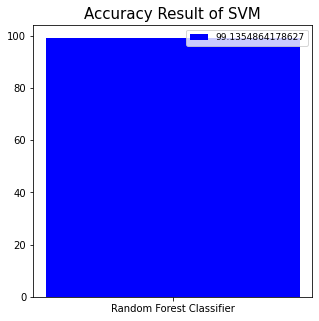

In [14]:
def Bar_Chart():
    import matplotlib.pyplot as plt
    data=[rfc]
    alg="Random Forest Classifier"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("Blue"))
    plt.title("Accuracy Result of SVM",fontsize=15)
    plt.legend(b,data,fontsize=9)
Bar_Chart()

Confusion matrix-Random Forest Classifier:
[[289   0   0   0   0   0]
 [  0 281   0   0   0   8]
 [  0   0 289   0   0   0]
 [  0   0   0 290   0   0]
 [  0   0   0   0 289   0]
 [  7   6   0   0   0 277]]


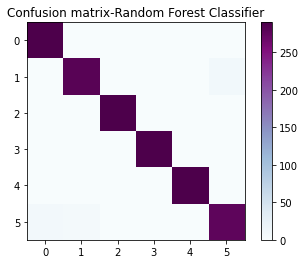

In [15]:
def plot_confusion_matrix(cm, title='Confusion matrix-Random Forest Classifier', cmap=plt.cm.BuPu):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predictRF)
print('Confusion matrix-Random Forest Classifier:')
print(cm)
plot_confusion_matrix(cm)

In [16]:
import joblib
joblib.dump(rf,'Attack.pkl')

['Attack.pkl']

# Perpetrator

In [17]:
df.columns

Index(['S.No', 'Crime', 'Gender', 'Age', 'Income', 'Job', 'Maritalstatus',
       'Education', 'Harm', 'Attack', 'AttackMethod', 'Perpetrator'],
      dtype='object')

In [18]:
#preprocessing, split test and dataset, split response variable
X = df[['Crime', 'Gender', 'Age', 'Income', 'Job', 'Maritalstatus', 'Education', 'Harm', 'Attack', 'AttackMethod']]
#Response variable
y = df['Perpetrator']

In [19]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(X,y)
print("OUR DATASET COUNT         : ", Counter(y))
print("OVER SAMPLING DATA COUNT  : ", Counter(y_ros))

OUR DATASET COUNT         :  Counter({1: 1020, 0: 782})
OVER SAMPLING DATA COUNT  :  Counter({1: 1020, 0: 1020})


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state=1, stratify=y_ros)
print("Number of training dataset : ", len(X_train))
print("Number of test dataset     : ", len(X_test))
print("Total number of dataset    : ", len(X_train)+len(X_test))

Number of training dataset :  1428
Number of test dataset     :  612
Total number of dataset    :  2040


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()

rf.fit(X_train,y_train)

predictRF = rf.predict(X_test)

print("")
print('Classification report of Random Forest Classifier Result is:')
print("")
print(classification_report(y_test,predictRF))
print("")

cm=confusion_matrix(y_test,predictRF)
print('Confusion Matrix result of Random Forest Classifier is:\n',cm)
print("")

accuracy = cross_val_score(rf, x_ros, y_ros, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)

print("")
print("Accuracy Result of Random Forest Classifier is:",accuracy.mean() * 100)
rfc=accuracy.mean() * 100


Classification report of Random Forest Classifier Result is:

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       306
           1       0.85      0.82      0.83       306

    accuracy                           0.84       612
   macro avg       0.84      0.84      0.84       612
weighted avg       0.84      0.84      0.84       612


Confusion Matrix result of Random Forest Classifier is:
 [[263  43]
 [ 56 250]]

Cross validation test results of accuracy:
[0.82598039 0.87990196 0.81862745 0.82352941 0.8995098 ]

Accuracy Result of Random Forest Classifier is: 84.95098039215685


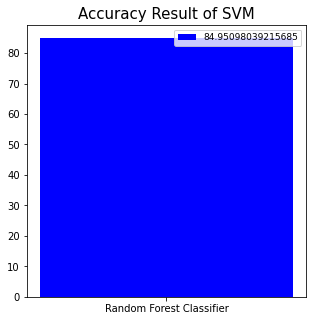

In [22]:
def Bar_Chart():
    import matplotlib.pyplot as plt
    data=[rfc]
    alg="Random Forest Classifier"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("Blue"))
    plt.title("Accuracy Result of SVM",fontsize=15)
    plt.legend(b,data,fontsize=9)
Bar_Chart()

Confusion matrix-Random Forest Classifier:
[[263  43]
 [ 56 250]]


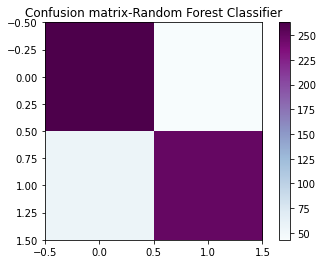

In [23]:
def plot_confusion_matrix(cm, title='Confusion matrix-Random Forest Classifier', cmap=plt.cm.BuPu):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predictRF)
print('Confusion matrix-Random Forest Classifier:')
print(cm)
plot_confusion_matrix(cm)

In [24]:
import joblib
joblib.dump(rf,'Perpetrator.pkl')

['Perpetrator.pkl']